In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import wget
%matplotlib inline

In [19]:
url1 = "https://raw.githubusercontent.com/udacity/cd0360-Introduction-to-Computer-Vision/main/1_2_Convolutional_Filters_Edge_Detection/images/stripes.jpg"
url2 = "https://raw.githubusercontent.com/udacity/cd0360-Introduction-to-Computer-Vision/main/1_2_Convolutional_Filters_Edge_Detection/images/pink_solid.jpg"
url3 = "https://raw.githubusercontent.com/udacity/cd0360-Introduction-to-Computer-Vision/main/1_2_Convolutional_Filters_Edge_Detection/images/birds.jpg"

file_name1 = f"./../images/{url1.split('/')[-1]}"
file_name2 = f"./../images/{url2.split('/')[-1]}"
file_name3 = f"./../images/{url3.split('/')[-1]}"

wget.download(url1, file_name1)
wget.download(url2, file_name2)
wget.download(url3, file_name3)

'./../images/birds.jpg'

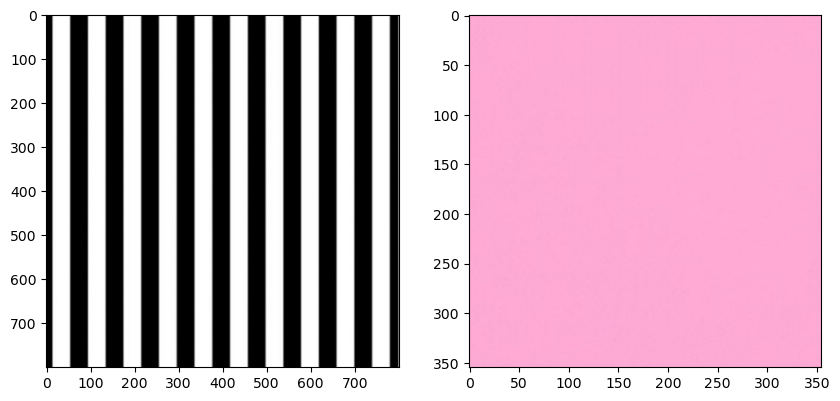

In [11]:
image_stripes = cv2.imread(file_name1)
image_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2RGB)

image_solid = cv2.imread(file_name2)
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.imshow(image_stripes)
ax2.imshow(image_solid)

In [13]:
gray_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2GRAY)
gray_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2GRAY)

norm_stripes = gray_stripes/255.0
norm_solid = gray_solid/255.0

def ft_image(norm_image):
    first_fourier = np.fft.fft2(norm_image)
    fourier_shift = np.fft.fftshift(first_fourier)
    frequency_tx = 20*np.log(np.abs(fourier_shift))

    return frequency_tx

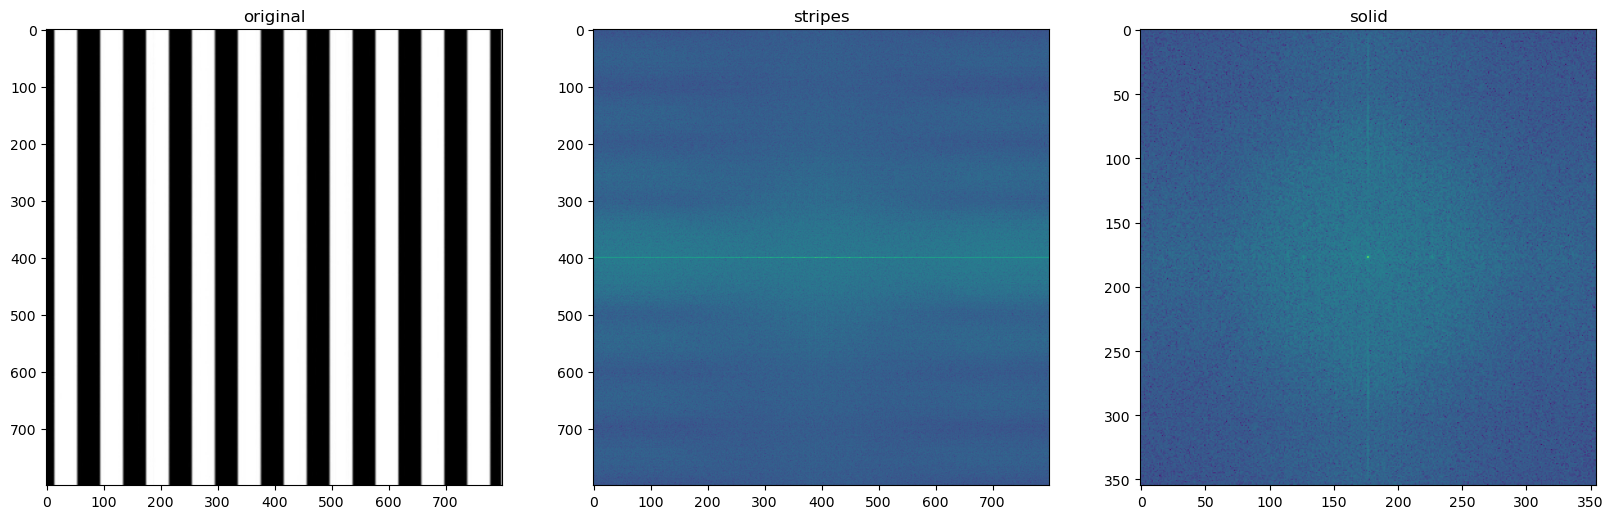

In [18]:
f_stripes = ft_image(norm_stripes)
f_solid = ft_image(norm_solid)

cols = 3
rows = 1
_, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20,10))
for i, (name, img) in enumerate(zip(['original', 'stripes', 'solid'], [image_stripes, f_stripes, f_solid])):
    ax[i].set_title(name)
    ax[i].imshow(img)


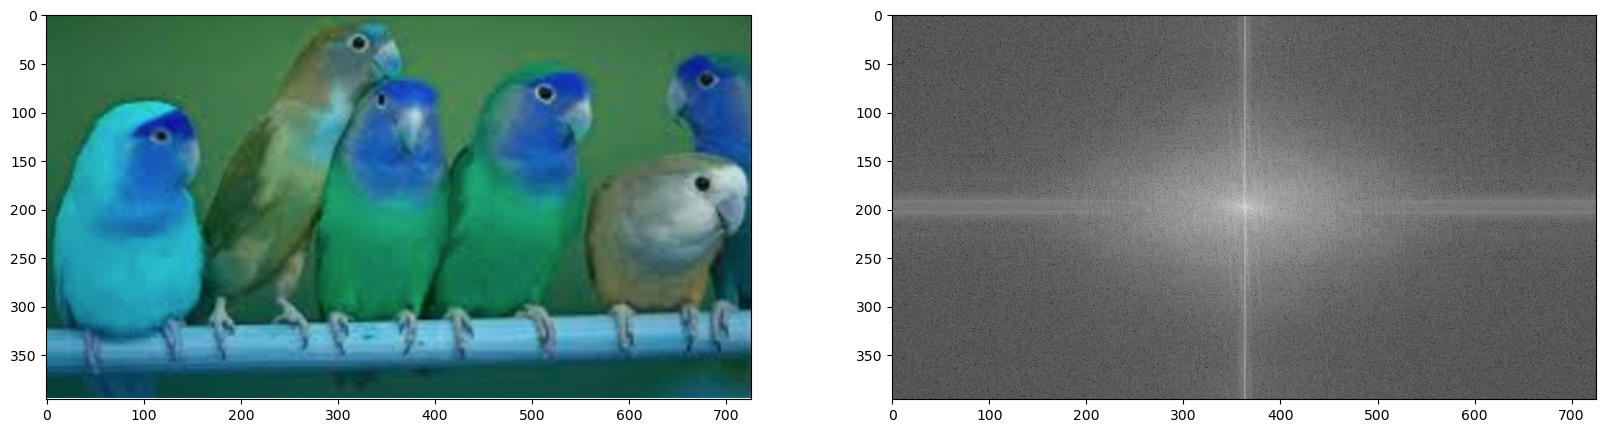

In [20]:
image = cv2.imread(file_name3)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

norm_image = gray / 255.0

f_image = ft_image(norm_image)
_, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(image)
ax2.imshow(f_image, cmap="gray")